# Author - Babita Rawat

## Data Science & Business Analytics Intern at [The Sparks Foundation](https://www.linkedin.com/company/the-sparks-foundation/mycompany/)

## Task6 : Prediction using Decision Tree Algorithm.

## Objective : Create the Decision Tree classifier and visualize it graphically.

### About Dataset

The given dataset has six columns, one contains the Id, four of them contains the features like sepal and petal length, sepal and petal width and last one contains the label of species. The dataset is [Iris Dataset](https://bit.ly/3kXTdox)

### About Model 

Decision Tree is type of Supervised Machine Learning where the data is continuously split according to a certain parameter. That is you explain what the input is and what the corresponding output is in the training data. The tree can be explained by two entities, namely decision nodes and leaves.
<br>The goal of using Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from training data.

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

### Importing Dataset

In [78]:
df=pd.read_csv('Iris.csv')
print('The dataset has imported successfully!!')

The dataset has imported successfully!!


In [79]:
pd.set_option('max_columns',None)
# It will display all columns of the dataframe
df.head()
# It will show top 5 columns of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
df.shape

(150, 6)

There are 150 rows and 6 columns in our Dataset.

In [81]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [82]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


It is telling us the basic information about all the columns

Now dropping the irrelevent columns.

In [83]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can see that there are no null values.

### Checking for duplicate values

In [85]:
df.duplicated().sum()

3

### Dropping The Duplicates Values¶

In [86]:
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

Here we remove all the duplicates value .

### Checking for outliers

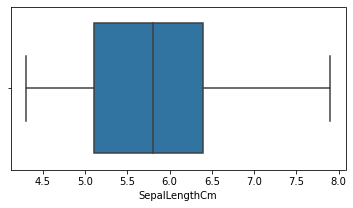

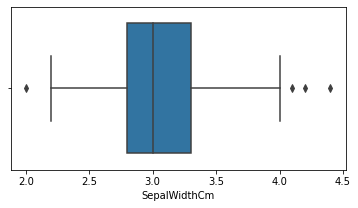

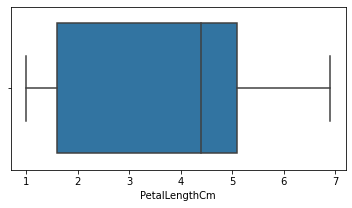

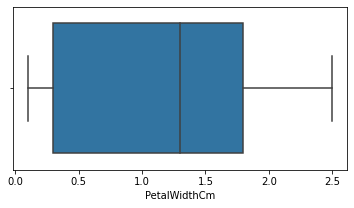

In [87]:
for i in df.columns:
    if df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(x=df[i],data=df)
        plt.show()

### Treating Outlier

<AxesSubplot:xlabel='SepalWidthCm'>

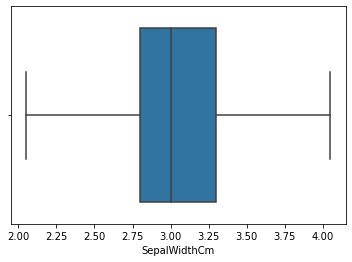

In [88]:
q1,q3=np.percentile(df['SepalWidthCm'],[25,75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence else lower_fence if x<lower_fence else x)
sns.boxplot(x=df['SepalWidthCm'],data=df)

### Visualizing data

<AxesSubplot:xlabel='Species', ylabel='count'>

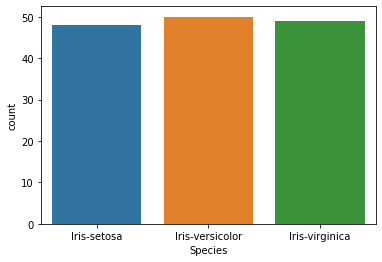

In [89]:
sns.countplot(x=df['Species'],data=df)

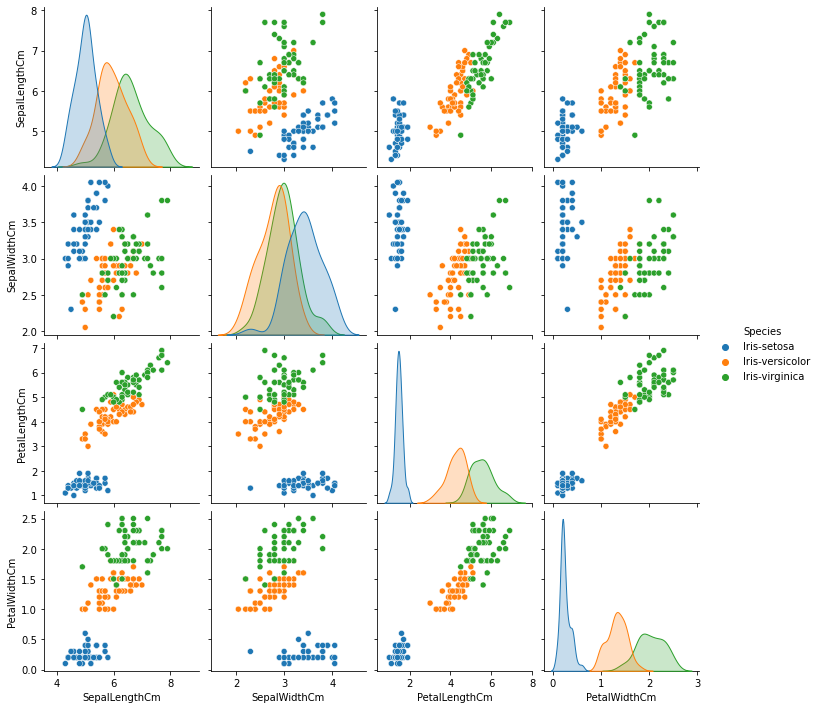

In [90]:
sns.pairplot(df,hue='Species')

From these figures we can conclude that

- Iris-setosa can be easily identified whereas Iris-versicolor and Iris-virginica are overlapping .

- Petal length and petal width are the most important features to identify the flowers .
- In other words, By looking the result of pair plot we sure that all the blue points are well separated with other two classes. But Versicolor and virginica are partially overlapping with each other.

<AxesSubplot:>

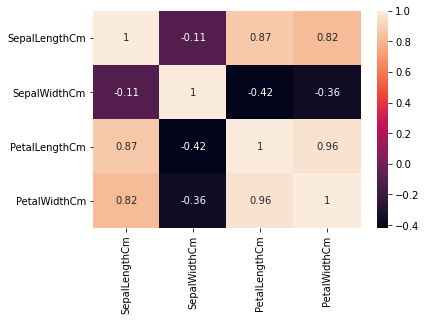

In [91]:
sns.heatmap(df.corr(),annot=True)

From the above HeatMap we can see that Petal Length and Petal Width are highly correlated with each other, Sepal Length is Moderately correlated with Petal Length and Petal Width whereas Sepal Width is negatively correlated with other three.

### Formatting the dataset

In [92]:
X=df.iloc[:, :4].values
Y=df.iloc[:,4].values

### Splitting the Data

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Training The Decision Tree Classification Model

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Visualizing Decision Tree

[Text(372.0, 757.1571428571428, 'PetalWidthCm <= 0.8\nentropy = 1.5805\nsamples = 110\nvalue = [33, 37, 40]\nclass = Iris-virginica'),
 Text(279.0, 640.6714285714286, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = Iris-setosa'),
 Text(465.0, 640.6714285714286, 'PetalWidthCm <= 1.75\nentropy = 0.9989\nsamples = 77\nvalue = [0, 37, 40]\nclass = Iris-virginica'),
 Text(279.0, 524.1857142857143, 'PetalLengthCm <= 5.35\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(186.0, 407.7, 'PetalWidthCm <= 1.45\nentropy = 0.2975\nsamples = 38\nvalue = [0, 36, 2]\nclass = Iris-versicolor'),
 Text(93.0, 291.21428571428567, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27, 0]\nclass = Iris-versicolor'),
 Text(279.0, 291.21428571428567, 'SepalWidthCm <= 2.6\nentropy = 0.684\nsamples = 11\nvalue = [0, 9, 2]\nclass = Iris-versicolor'),
 Text(186.0, 174.7285714285714, 'SepalLengthCm <= 6.1\nentropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]\nclass = Iris-versicolor'),


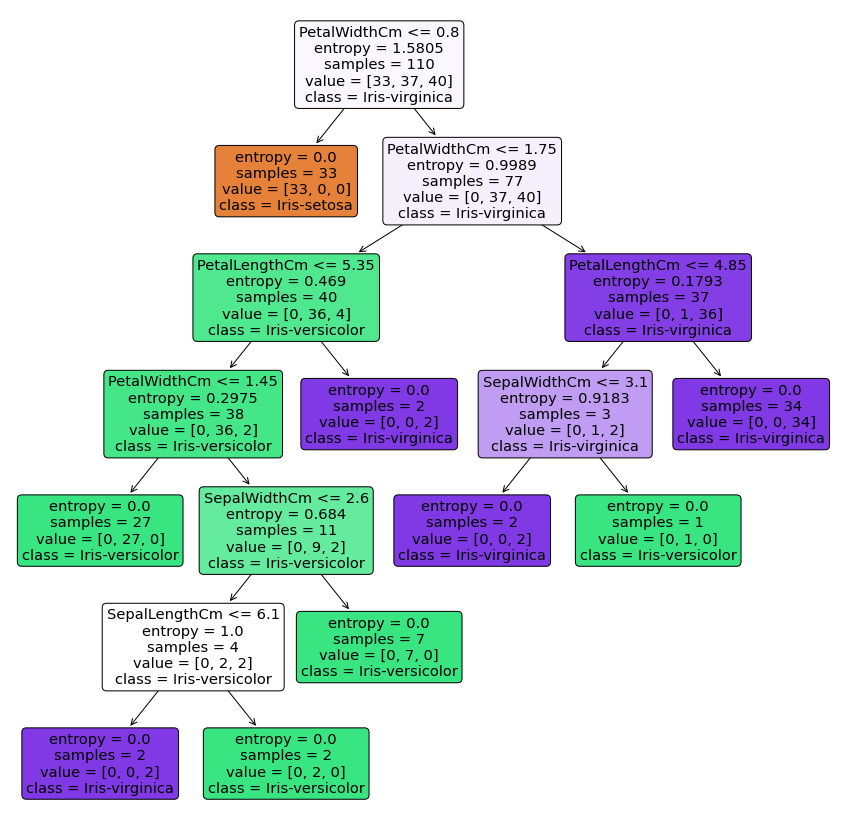

In [95]:
plt.figure(figsize=(15,15))
plot_tree(dtree,feature_names=df.columns,class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],
          filled=True,precision=4,rounded=True)

### Testing Model

In [96]:
pred=dtree.predict(x_test)  # To make predictions on the test dataset
print(pred)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor']


### Evaluating the model

As our model has been trained. Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.

Checking our model performance on actual unseen test data

In [97]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

y_preds = dtree.predict(x_test)

print("Model Accuracy Score on totally unseen data (X_test) is: ", accuracy_score(y_test, y_preds) * 100, '%')
print(multilabel_confusion_matrix(y_test, y_preds))

Model Accuracy Score on totally unseen data (X_test) is:  97.2972972972973 %
[[[22  0]
  [ 0 15]]

 [[23  1]
  [ 0 13]]

 [[28  0]
  [ 1  8]]]


In [98]:
print("Testing Score: ",dtree.score(x_test,y_test))

Testing Score:  0.972972972972973


# Thank You!